In [1]:
import pandas as pd
import numpy as np
from collections import Counter 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection



In [2]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv"



df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [27]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='int64')

In [3]:
# Verificar a descrição estatística dos dados
df.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
# Verificar a presença de valores nulos
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [5]:
# Verificar a distribuição das classes
print(df.shape)
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Classe=%d, Contagem=%d, Porcentagem=%.2f%%' % (k, v, per))

(1000, 21)
Classe=1, Contagem=700, Porcentagem=70.00%
Classe=2, Contagem=300, Porcentagem=30.00%


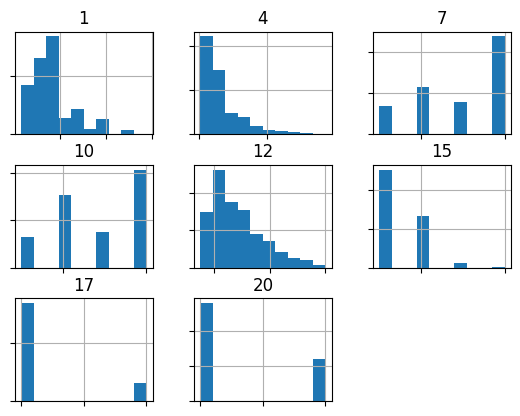

In [6]:
# Verificar quais colunas são numéricas e criar um histograma
numerical = df.select_dtypes(include=['int64', 'float64']).columns

# Selecionar um subset do DataFrame com as colunas escolhidas
subset = df[numerical]

# Criar um histograma para cada coluna
ax = subset.hist()

# Desabilitar os rótulos dos eixos
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

# O título de cada histograma representa o nome (número) da coluna correspondente
# Podemos ver distribuições diferentes para cada coluna
# Dependendo da escolha do algoritmo, temos que aplicar o processo de escalar os valores e realizar transformações de potência

- Falso Negativo: clientes ruins (classe 1) previstos como clientes bons (classe 0)
- Falso Positivo: clientes bons (classe 0) previstos como clientes ruins (classe 1)
- Falsos negativos, são mais prejudiciais aos bancos do que os falsos positivos



In [7]:
# Dividir os dados em inputs e outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]


In [8]:
# Agora temos que selecionar todas as variáveis de entrada que são categóricas
# depois de seleciona-las vamos aplicar one hot encoding 
categorical = X.select_dtypes(include=['object', 'bool']).columns


# Aplicar one hot encoding
ct = ColumnTransformer([('o', OneHotEncoder(), categorical)], remainder='passthrough')
X = ct.fit_transform(X)

# Aplicar label encode na variável alvo
y = LabelEncoder().fit_transform(y)



In [9]:
# Calcular o f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# Avaliar o modelo usando o f2-measure
def evaluate_model(X, y, model):
    # definir o processo de avaliação
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # definir a métrica de avaliação do modelo 
    metric = make_scorer(f2_measure)
    # avaliar o modelo
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# * Avaliar um modelo de referência
# definir modelo de referência
model = DummyClassifier(strategy='constant', constant=1)

# Após a avaliação do modelo podemos ter os resultados da média e do desvio padrão da métrica F2 measure
scores = evaluate_model(X, y, model)
print('Média F2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Média F2: 0.682 (0.000)


- O modelo base encontrou uma média F2 de 0.682 
- Esse valor serve como referência de limite inferior para comparações futuras com outros modelos.
- Qualquer modelo que alcance uma média da medida F2 superior a 0.682 pode ser considerado uma melhoria em relação ao modelo base.
- O desvio padrão no modelo base foi 0, isso significa que o resultado da métrica F2 foi exatamente o mesmo em todas as 30 rodadas de validação cruzada
    - isso acontece porque o DummyClassifier com strategy='constant' e constant=1 é muito simples. Ele sempre prevê 1 para qualquer entrada
    - como ele sempre faz a mesma previsão, e a distribuição das classes é mantida na validação cruzada estratificada, a métrica F2 
    sempre será a mesma em cada fold, resultando em um desvio padrão 0



### Avaliação de modelos

serão avaliados os seguintes modelos:

- Regressão Logística (LR) 
- Análise Discriminante Linear (LDA)
- Naive Bayes (NB) — Naive Bayes
- Gaussian Process Classifier (GPC) 
- Support Vector Machine (SVM) 

In [10]:
# Criar função para avaliar os modelos
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    return models, names




>LR 0.497 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_20384\3988849160.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


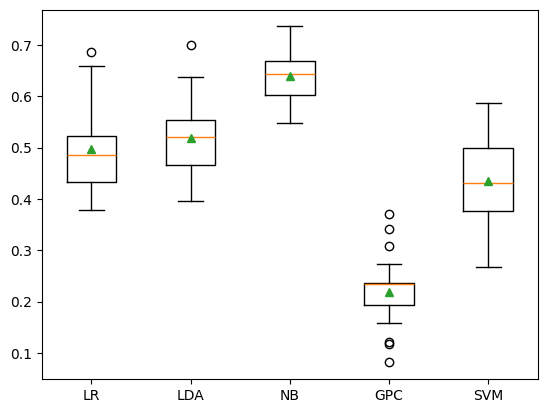

In [11]:

# Dividir os dados em inputs e outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]
y = LabelEncoder().fit_transform(y)

# Selecionar colunas categóricas e numéricas
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

# definir modelos
models, names = get_models()
results = list()

for i in range(len(models)):
    # aplicar one hot enconde e normalização das colunas numéricas
    ct = ColumnTransformer([('c', OneHotEncoder(), cat_ix), ('n', MinMaxScaler(), num_ix)])
    # Criar o pipeline
    pipeline = Pipeline(steps=[('t', ct), ('m', models[i])])
    # avaliar o modelo e armazenar resultados
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # Apresentar resultados
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))


# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Nenhum modelo teve desempenho melhor do que o modelo de referência

#### Avaliar técnicas de subamostragem

- A subamostragem pode ajudar a remover exemplos da classe majoritária ao longo da borda de decisão que tornam o problema desafiador para os algoritmos
- Ao contrário da superamostragem que cria novas amostras da classe minoritária, a subamostragem remove amostras da classe majoritária
- O principal objetivo da subamostragem, não é apenas reduzir o número de amostras da classe majoritária aleatoriamente. É fazer isso de forma inteligente e estratégica
    - Isso significa identificar e eliminar amostras da classe majoritária que estão muito próximas da classe minoritária
    - Ao remover esses exemplos problemáticos, o algoritmo de classificação pode encontrar uma fronteira de decisão mais clara e menos complexa, melhorando seu desempenho, especialmente na identificação da classe minoritária
- Serão utilizadas as seguintes técnicas:
    - Tomek Links (TL)
    - Edited Nearest Neighbors (ENN)
    - Repeated Edited Nearest Neighbors (RENN)
    - One Sided Selection (OSS)
    - Neighborhood Cleaning Rule (NCR)

- Tomek Links (TL): Identifica pares de amostras de classes diferentes que são vizinhas mais próximas uma da outra. Remove a amostra da classe majoritária desse par. Isso ajuda a "limpar" a fronteira de decisão

- Edited Nearest Neighbors (ENN): Para cada amostra da classe majoritária, verifica seus vizinhos mais próximos. Se a maioria dos vizinhos for de uma classe diferente, essa amostra da classe majoritária é removida. Isso remove amostras "ruidosas" ou que estão em regiões de outras classes

- Repeated Edited Nearest Neighbors (RENN): Aplica o ENN múltiplas vezes até que nenhuma amostra possa ser removida, ou até um limite. Isso intensifica a limpeza da fronteira de decisão

- One Sided Selection (OSS): Combina Tomek Links com um algoritmo de vizinhos mais próximos para selecionar um subconjunto da classe majoritária que mantém a capacidade de classificação sem ser redundante. Remove amostras da classe majoritária que são redundantes ou que formam Tomek Links

- Neighborhood Cleaning Rule (NCR): É uma extensão do ENN. Para cada amostra da classe majoritária, se ela for mal classificada por seus vizinhos, ela é removida. Além disso, se uma amostra da classe minoritária for mal classificada por seus vizinhos, os vizinhos da classe majoritária são removidos. Isso visa limpar o "bairro" de ambas as classes

In [12]:
# definir modelos de subamostragem
def get_models():
    models, names = list(), list()
    # TL
    models.append(TomekLinks())
    names.append('TL')
    # ENN
    models.append(EditedNearestNeighbours())
    names.append('ENN')
    # RENN
    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')
    # OSS
    models.append(OneSidedSelection())
    names.append('OSS')
    # NCR
    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    return models, names


>TL 0.669 (0.057)
>ENN 0.706 (0.048)
>RENN 0.714 (0.041)
>OSS 0.669 (0.056)
>NCR 0.683 (0.053)


C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_20384\1576904660.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


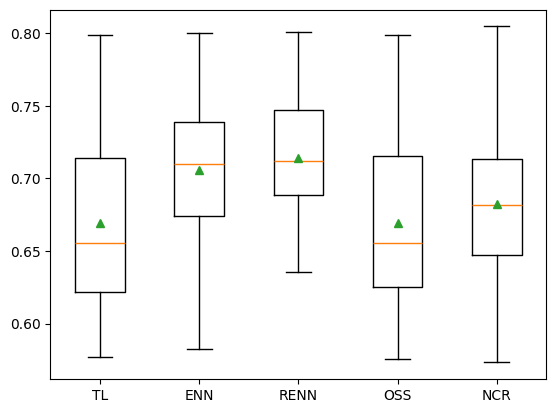

In [13]:

# Dividir os dados em inputs e outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]
y = LabelEncoder().fit_transform(y)

# Selecionar colunas categóricas e numéricas
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

# Definir os modelos
models, names = get_models()
results = list()


# Avaliar os modelos
for i in range(len(models)):
    # Definir o modelo a ser avaliado
    model = LogisticRegression(solver='liblinear', class_weight='balanced')
    # Aplicar one hot encode e normalização das colunas numéricas
    ct = ColumnTransformer([('c', OneHotEncoder(), cat_ix), ('n', MinMaxScaler(), num_ix)])
    # Escalar os dados, gerar subamostragem e ajustar o modelo
    pipeline = Pipeline(steps=[('t', ct), ('s', models[i]), ('m', model)])
    # Avaliar o modelo e armazenar os resultados
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # Apresentar resultados
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

# Gráficos
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# 0.682


- Três das cinco técnicas de subamostragem tiveram um resultado melhor que o modelo base (0.682)
    - ENN, RENN e NCR


### Definir o modelo final

In [19]:
# Dividir os dados em inputs e outputs
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]
y = LabelEncoder().fit_transform(y)

# Selecionar colunas categóricas e numéricas
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

# Definir o modelo de classificação
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# Aplicar one hot encode e normalização das colunas numéricas (transformação dos dados)
ct = ColumnTransformer([('c', OneHotEncoder(), cat_ix), ('n', MinMaxScaler(), num_ix)])
# Escalar os dados, gerar subamostragem e ajustar o modelo
    # 't': aplica as transformações definidas no ColumnTransformer
    # 's': aplica a técnica de subamostragem (RENN) para balancear o conjunto de dados
    # 'm': aplica o modelo de classificação
pipeline = Pipeline(steps=[('t', ct), ('s', RepeatedEditedNearestNeighbours()), ('m', model)])
# Treina o modelo
    # Transforma os dados de entrada (X)
    # Aplica a subamostragem para balancear as classes
    # Treina o modelo com os dados transformados e balanceados
pipeline.fit(X, y)


,steps,"[('t', ...), ('s', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('c', ...), ('n', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


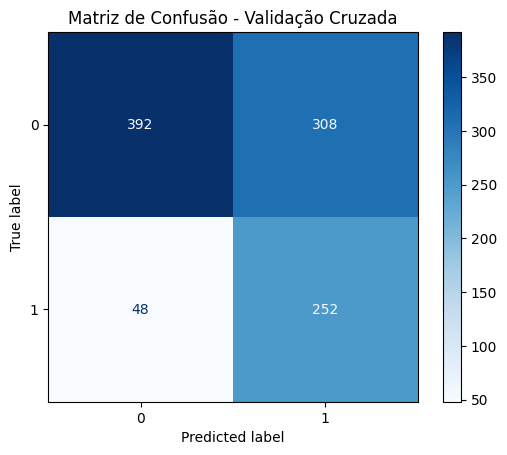

Precisão (classe 1): 45.00%
Recall (classe 1): 84.00%
F1-score (classe 1): 58.60%


In [24]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Usar StratifiedKFold sem repetições
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Obter predições usando validação cruzada
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)

# Calcular matriz de confusão
cm = confusion_matrix(y, y_pred)

# Plotar matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Validação Cruzada')
plt.show()

# Calcular métricas de avaliação
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Exibir métricas de avaliação
print(f'Precisão (classe 1): {precision * 100:.2f}%')
print(f'Recall (classe 1): {recall * 100:.2f}%')
print(f'F1-score (classe 1): {f1 * 100:.2f}%')

- Precisão de 45%, indica a proporção de verdadeiros positivos (clientes ruins) dentro de todas as previsões dentro da classe de clientes ruins
    - 252 / (252 + 308) = 45%
- Recall de 84%, indica a proporção de verdadeiros positivos (clientes ruins) dentro de todos os verdadeiros clientes ruins
    - 252 / (252 + 48) = 84%
- F1-Score é a média harmônica entre precisão e recall

Analisando os resultados da matriz de confusão o modelo tem um bom recall, o que é alinhado com o objetivo de minimizar falsos negativos (emprestar para clientes ruins). A precisão é menor, indicando que há muitos falsos positivos, o que pode ser ajustado dependendo do custo que o banco está disposto a aceitar

In [30]:
def get_feature_names(column_transformer):
    feature_names = []
    for name, trans, cols in column_transformer.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(cols, 'tolist'):
            input_features = [str(c) for c in cols.tolist()]
        else:
            input_features = [str(c) for c in cols]
        if hasattr(trans, 'get_feature_names_out'):
            # Aqui o OneHotEncoder vai gerar nomes como "3_A30", "3_A31", etc.
            names = trans.get_feature_names_out(input_features)
        else:
            names = input_features
        feature_names.extend(names)
    return feature_names

transformer = pipeline.named_steps['t']
feature_names = get_feature_names(transformer)

logreg_model = pipeline.named_steps['m']
coefficients = logreg_model.coef_[0]

import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np

df_coef = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
})

df_coef = df_coef.sort_values(by='abs_coefficient', ascending=False)

print(df_coef)

    feature  coefficient  abs_coefficient
3     0_A14    -2.003132         2.003132
55        4     1.373186         1.373186
10    3_A41    -1.331613         1.331613
0     0_A11     1.282397         1.282397
8     2_A34    -1.266363         1.266363
54        1     1.261570         1.261570
40  13_A141     1.210741         1.210741
35   9_A103    -1.171412         1.171412
16    3_A46     1.152505         1.152505
36  11_A121    -1.041908         1.041908
22    5_A64    -0.951421         0.951421
13    3_A43    -0.875828         0.875828
52  19_A201     0.869604         0.869604
15    3_A45     0.853071         0.853071
42  13_A143    -0.850635         0.850635
53  19_A202    -0.840831         0.840831
45  14_A153     0.838647         0.838647
34   9_A102     0.806782         0.806782
19    5_A61     0.801405         0.801405
27    6_A74    -0.743528         0.743528
39  11_A124     0.738491         0.738491
56        7     0.686271         0.686271
44  14_A152    -0.683887         0

Cada feature segue a lógica coluna_original_categoria
- Ex: 0_A14 → Coluna 0, categoria A14 (Status da conta corrente = sem conta)
- Ex: 2_A34 → Coluna 2, categoria A34 (Histórico de crédito = conta crítica / outros créditos existentes)
- Ex: 14_A151 → Coluna 14, categoria A151 (Plano de prestação em outro banco = bank)
---

- Coeficiente positivo: Aumenta a probabilidade de cliente ruim.
    - Ex: 0_A11 = +1.28 → clientes com conta corrente "< 0 DM" aumentam chance de default → risco maior.
- Coeficiente negativo: Diminui a probabilidade de cliente ruim (associado a clientes bons).
    - Ex: 0_A14 = -2.00 → clientes sem conta corrente reduzem a chance de default → risco menor (pelo menos no dataset).
- Magnitude importa: Quanto maior o valor absoluto, maior o impacto.
    - | -2.00 | é mais forte que | +0.30 |.